## Import libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data pre-processing & exploration

In [52]:
student_df = pd.read_csv('../data/student.csv')

student_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### How many rows/columns are there in the dataset?

In [53]:
n_rows, n_cols = student_df.shape

n_rows, n_cols

(649, 33)

### Explore rows

In [54]:
duplicate_rows = student_df.duplicated()

is_duplicate = duplicate_rows.any()

is_duplicate    

False

### Explore columns

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

- sex - student's sex (binary: 'F' - female or 'M' - male)

- age - student's age (numeric: from 15 to 22)

- address - student's home address type (binary: 'U' - urban or 'R' - rural)

- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

- guardian - student's guardian (nominal: 'mother', 'father' or 'other')

- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

- failures - number of past class failures (numeric: n if 1<=n<3, else 4)

- schoolsup - extra educational support (binary: yes or no)

- famsup - family educational support (binary: yes or no)

- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

- activities - extra-curricular activities (binary: yes or no)

- nursery - attended nursery school (binary: yes or no)

- higher - wants to take higher education (binary: yes or no)

- internet - Internet access at home (binary: yes or no)

- romantic - with a romantic relationship (binary: yes or no)

- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

- freetime - free time after school (numeric: from 1 - very low to 5 - very high)

- goout - going out with friends (numeric: from 1 - very low to 5 - very high)

- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

- health - current health status (numeric: from 1 - very bad to 5 - very good)

- absences - number of school absences (numeric: from 0 to 93)

- G1 - first period grade (numeric: from 0 to 20)

- G2 - second period grade (numeric: from 0 to 20)

- G3 - final grade (numeric: from 0 to 20, output target)

In [55]:
new_names = ["School", "Sex", "Age", "Address", "Family size", "Parent's cohabitation status", 
                    "Mother's education", "Father's education", "Mother's job", "Father's job", 
                    "Reason", "Student's guardian", "Home to school", "Weekly study time", 
                    "Class Failures", "Extra education support", "Family education support", 
                    "Extra paid", "Extra curricular", "Nursery", 
                    "Want to take higher education", "Internet at home", "In a romantic relationship", 
                    "Family relationships", "Free time at school", "Going out with friends", 
                    "Workday alcohol consumption", "Weekend alcohol consumption", "Current health status", 
                    "School absences", "First period grade", "Second period grade", "Final grade"]

student_df.columns = new_names

student_df

,School,Sex,Age,Address,Family size,Parent's cohabitation status,Mother's education,Father's education,Mother's job,Father's job,...,Family relationships,Free time at school,Going out with friends,Workday alcohol consumption,Weekend alcohol consumption,Current health status,School absences,First period grade,Second period grade,Final grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### Handle missing data & Convert data

In [56]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   School                         649 non-null    object
 1   Sex                            649 non-null    object
 2   Age                            649 non-null    int64 
 3   Address                        649 non-null    object
 4   Family size                    649 non-null    object
 5   Parent's cohabitation status   649 non-null    object
 6   Mother's education             649 non-null    int64 
 7   Father's education             649 non-null    int64 
 8   Mother's job                   649 non-null    object
 9   Father's job                   649 non-null    object
 10  Reason                         649 non-null    object
 11  Student's guardian             649 non-null    object
 12  Home to school                 649 non-null    int64 
 13  Weekl

We can see that, all of the columns do not have missing data and none of them have inappropriate data types

### For each column with numeric data type, how are the values distributed?

- Step 1: Determine the quantile values **(min, 25%, 50%, 75%, max)**

In [57]:
# YOUR CODE HERE
num_col_info_df = None

# Define the aggregation functions
def quantile_25(col):
    return col.quantile(0.25)

def quantile_75(col):
    return col.quantile(0.75)

def quantile_50(col):
    return col.quantile(0.5)

# Assuming student_df has already been defined and contains your data
if student_df is not None:
    num_col_info_df = student_df.select_dtypes(include=['number'])

    # num_col_info_df.index = ["missing_ratio", "min", "quantile_25", "quantile_50", "quantile_75", "max"]   

    # Save the result using agg()
    num_col_info_df = num_col_info_df.agg(["min", quantile_25, quantile_50, quantile_75, "max"])
    num_col_info_df = num_col_info_df.round(1)

num_col_info_df.index = ['Min', '25%', '50%', '75%', 'Max']

num_col_info_df


,Age,Mother's education,Father's education,Home to school,Weekly study time,Class Failures,Family relationships,Free time at school,Going out with friends,Workday alcohol consumption,Weekend alcohol consumption,Current health status,School absences,First period grade,Second period grade,Final grade
Min,15.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
25%,16.0,2.0,1.0,1.0,1.0,0.0,4.0,3.0,2.0,1.0,1.0,2.0,0.0,10.0,10.0,10.0
50%,17.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,11.0,11.0,12.0
75%,18.0,4.0,3.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,3.0,5.0,6.0,13.0,13.0,14.0
Max,22.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,32.0,19.0,19.0,19.0


- Step 2: Draw data distributions in order to understand more about numeric columns.

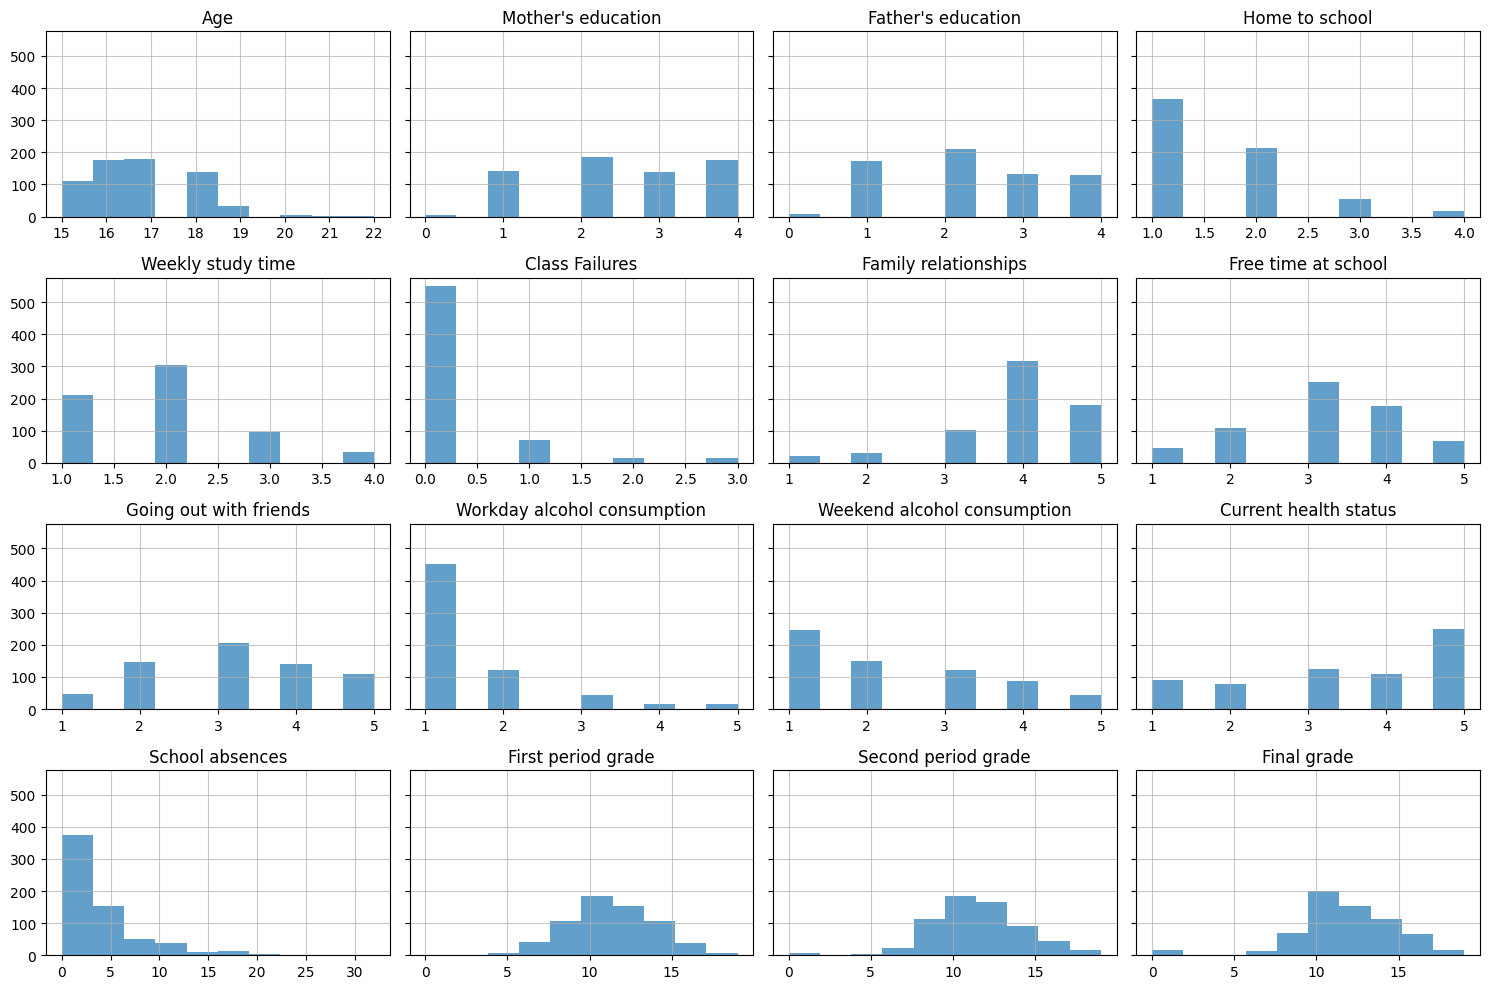

In [58]:
# TODO: draw 7 histogram
# Specify the number of rows and columns for subplots
num_rows = 4
num_cols = 4

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), sharey=True, tight_layout=True)

axes = axes.flatten()

# Draw histogram for 7 columns
for i, column in enumerate(num_col_info_df.columns):
    axes[i].hist(student_df[column].fillna(0),bins=10, alpha=0.7)
    axes[i].set_title(column)
    
    axes[i].grid(axis='both', linestyle='-', alpha=0.7)

# Remove any empty subplots
for j in range(len(num_col_info_df.columns), len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.show()

- Most of students in this survey are at the age 16-17
- Mother's education & Father's education in level 1 is highest
- 2/3 of students has home near school
- Most of students has no class failure in school
- There are no abnormal data values 

### For each column with categorical data type, how are the values distributed?

- Step 1: Compute the **number of different attributes** and a **dictionary** whose keys and values are attributes and number of each attribute, corresponding.

In [59]:
# Step 1: Define a custom aggregation function to calculate the distribution
def calculate_distribution(series):
    value_counts = series.value_counts()
    return value_counts.to_dict()

# Step 2: Use agg to perform both calculations
agg_result = student_df.select_dtypes(exclude=['number']).agg(['nunique', calculate_distribution])

# Step 3: Transpose the result for the final DataFrame
single_cate_profile = agg_result.transpose()

# Rename the columns for better readability
single_cate_profile.columns = ['num_diff_vals', 'distribution']

single_cate_profile = single_cate_profile.transpose()

# Display the result
single_cate_profile


,School,Sex,Address,Family size,Parent's cohabitation status,Mother's job,Father's job,Reason,Student's guardian,Extra education support,Family education support,Extra paid,Extra curricular,Nursery,Want to take higher education,Internet at home,In a romantic relationship
num_diff_vals,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
distribution,"{'GP': 423, 'MS': 226}","{'F': 383, 'M': 266}","{'U': 452, 'R': 197}","{'GT3': 457, 'LE3': 192}","{'T': 569, 'A': 80}","{'other': 258, 'services': 136, 'at_home': 135...","{'other': 367, 'services': 181, 'at_home': 42,...","{'course': 285, 'home': 149, 'reputation': 143...","{'mother': 455, 'father': 153, 'other': 41}","{'no': 581, 'yes': 68}","{'yes': 398, 'no': 251}","{'no': 610, 'yes': 39}","{'no': 334, 'yes': 315}","{'yes': 521, 'no': 128}","{'yes': 580, 'no': 69}","{'yes': 498, 'no': 151}","{'no': 410, 'yes': 239}"


+ There are no abnormal data values 

- Step 2: Visualize the distribution using pie chart.

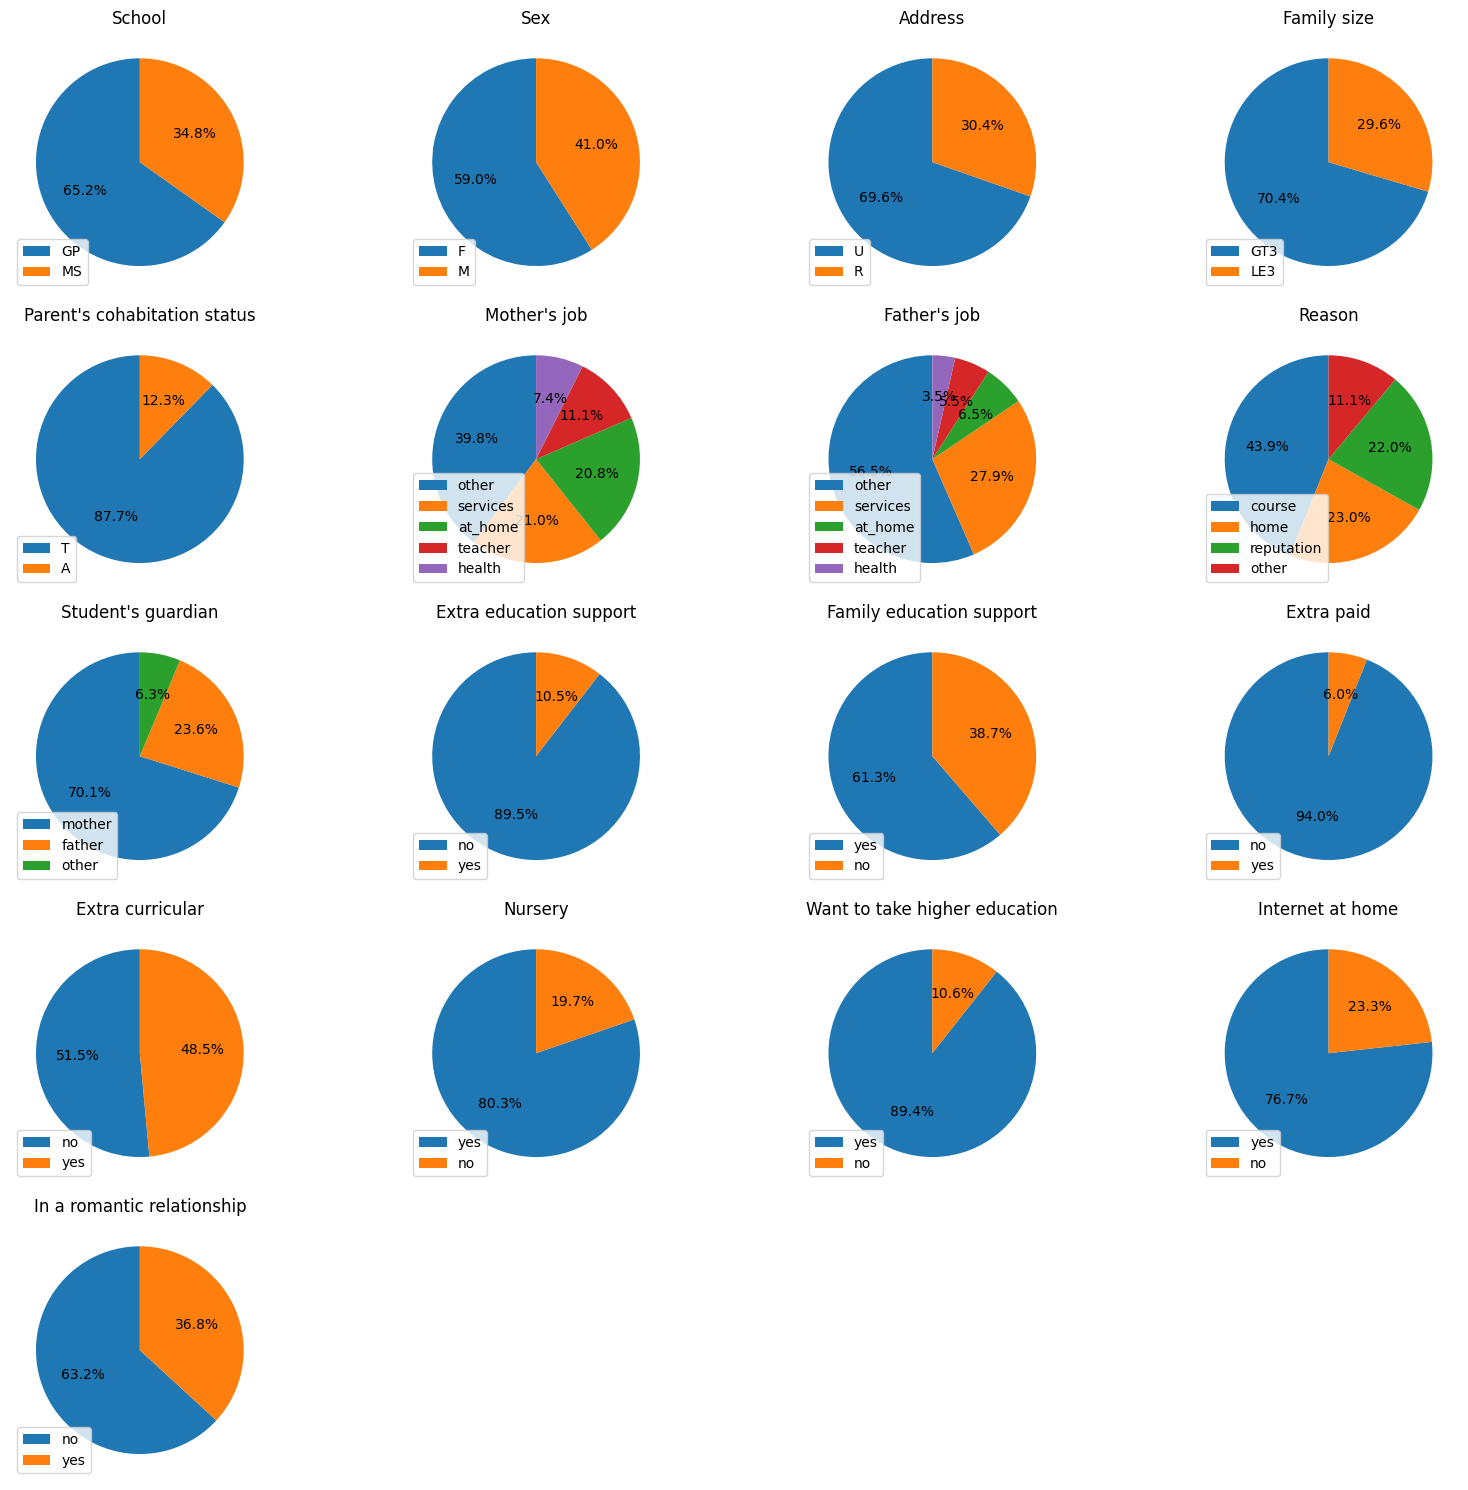

In [60]:
# TODO: code step 2
# Array for value in dataframe
distribution_index = []
distribution_value = []

# Set up subplots
length = len(single_cate_profile.columns)
num_columns = 4
num_rows = (length // 4) + (length % 4) 
fig, axes = plt.subplots(num_rows, num_columns, figsize=(4 * num_columns, 15))
axes = axes.flatten()

for i, column in enumerate(single_cate_profile.columns):
    # Get index and value because the data is a dictionary
    for index, value in single_cate_profile[column]['distribution'].items():
        distribution_index.append(index)
        distribution_value.append(value)

    # Plot on the subplot
    ax = axes[i]
    ax.pie(distribution_value, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{column}')
    ax.legend(labels=distribution_index, loc='lower left')

    # Reset arrays
    distribution_index = []
    distribution_value = []

# Remove empty subplots
for i in range(len(single_cate_profile.columns), len(axes)):
    fig.delaxes(axes[i])
    
# Adjust layout
plt.tight_layout()
plt.show()


In [61]:
student_df.to_csv("../data/student_processed.csv", index=False)